In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

 # Sgula05.08-1700

In [2]:
sgula_rush_hour= pd.read_csv("sgula05.08-1700.csv")

In [3]:
sgula_rush_hour= sgula_rush_hour.drop(['Unnamed: 0'], 1)

In [4]:
date_sgula_rh= pd.to_datetime("2021.08.05 1700")

In [5]:
sgula_rush_hour["date"]= date_sgula_rh
sgula_rush_hour

,Frame,label,id,confidence,date
0,1,car,0,59.42,2021-08-05 17:00:00
1,1,car,1,61.77,2021-08-05 17:00:00
2,1,car,2,67.40,2021-08-05 17:00:00
3,1,car,3,70.51,2021-08-05 17:00:00
4,1,car,4,75.37,2021-08-05 17:00:00
...,...,...,...,...,...
86776,6294,car,131,81.39,2021-08-05 17:00:00
86777,6294,car,195,85.89,2021-08-05 17:00:00
86778,6294,car,163,86.32,2021-08-05 17:00:00
86779,6294,car,125,87.78,2021-08-05 17:00:00


In [6]:
sgula_rush_hour.nunique()

Frame         6294
label            4
id             191
confidence    4115
date             1
dtype: int64

## Getting the car id's that only have one label

In [7]:
sgula_rush_hour.groupby("id").agg({"label": "value_counts"})

label
id  label       
0   car      372
    truck     11
    bus        2
1   car      968
    truck     55
...          ...
196 car       13
197 car        5
198 car       67
    bus        5
199 car       27

[357 rows x 1 columns]

In [8]:
newframe= sgula_rush_hour.groupby(["id","label"]).count()
newframe

Frame  confidence  date
id  label                         
0   bus        2           2     2
    car      372         372   372
    truck     11          11    11
1   bus        6           6     6
    car      968         968   968
...          ...         ...   ...
196 car       13          13    13
197 car        5           5     5
198 bus        5           5     5
    car       67          67    67
199 car       27          27    27

[357 rows x 3 columns]

In [9]:
newframe2= sgula_rush_hour.label.groupby([sgula_rush_hour.id]).describe()
newframe2

,count,unique,top,freq
id,,,,
0,385,3,car,372
1,1029,3,car,968
2,577,1,car,577
3,986,3,car,944
4,1314,3,car,1169
...,...,...,...,...
195,1021,1,car,1021
196,13,1,car,13
197,5,1,car,5


In [10]:
mask=sgula_rush_hour.label.groupby([sgula_rush_hour.id]).describe()["unique"]<2
mask

id
0      False
1      False
2       True
3      False
4      False
       ...  
195     True
196     True
197     True
198    False
199     True
Name: unique, Length: 191, dtype: bool

In [11]:
newframe2.loc[mask]

,count,unique,top,freq
id,,,,
2,577,1,car,577
15,233,1,car,233
31,41,1,car,41
41,409,1,car,409
52,40,1,car,40
...,...,...,...,...
194,8,1,car,8
195,1021,1,car,1021
196,13,1,car,13


 ## Ploting


In [12]:
cars_perframe_sgula_rh= sgula_rush_hour.id.groupby([sgula_rush_hour.Frame]).describe()
cars_perframe_sgula_rh= list(cars_perframe_sgula_rh["count"])

In [13]:
frames_sgula_rh= sgula_rush_hour.Frame.unique()

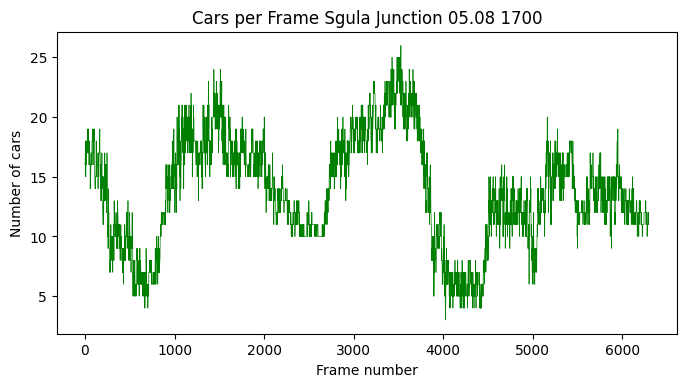

In [14]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(frames_sgula_rh, cars_perframe_sgula_rh, color= "green", lw= 0.5)
plt.xlabel('Frame number')
plt.ylabel('Number of cars')
plt.title('Cars per Frame Sgula Junction 05.08 1700')
plt.show()


 # Sgula08.08-1120

In [15]:
sgula_middle_morning= pd.read_csv("sgula08.08-1120.csv")

In [16]:
sgula_middle_morning= sgula_middle_morning.drop(['Unnamed: 0'], 1)

In [17]:
date_sgula_mm= pd.to_datetime("2021.08.08 1120")

In [18]:
sgula_middle_morning ["datetime"]= date_sgula_mm
sgula_middle_morning

,Frame,label,id,confidence,datetime
0,1,car,0,50.04,2021-08-08 11:20:00
1,1,bus,1,50.17,2021-08-08 11:20:00
2,1,car,4,55.23,2021-08-08 11:20:00
3,1,car,5,62.95,2021-08-08 11:20:00
4,1,car,7,65.73,2021-08-08 11:20:00
...,...,...,...,...,...
100900,6076,car,183,83.82,2021-08-08 11:20:00
100901,6076,car,213,86.01,2021-08-08 11:20:00
100902,6076,car,170,86.06,2021-08-08 11:20:00
100903,6076,car,184,88.30,2021-08-08 11:20:00


In [19]:
sgula_middle_morning.nunique()

Frame         6076
label            4
id             208
confidence    4223
datetime         1
dtype: int64

In [20]:
sgula_middle_morning.groupby("id")['Frame'].count().describe()

count     208.000000
mean      485.120192
std       749.067111
min         1.000000
25%        44.500000
50%       171.000000
75%       452.000000
max      4174.000000
Name: Frame, dtype: float64

## Ploting comparision between Sgula's Junction at Rush Hour and at Middle Morning

In [21]:
cars_perframe_sgula_mm= sgula_middle_morning.id.groupby([sgula_middle_morning.Frame]).describe()
cars_perframe_sgula_mm= list(cars_perframe_sgula_mm["count"])

In [22]:
frames_sgula_mm= sgula_middle_morning.Frame.unique()
frames_sgula_mm

array([   1,    2,    3, ..., 6074, 6075, 6076], dtype=int64)

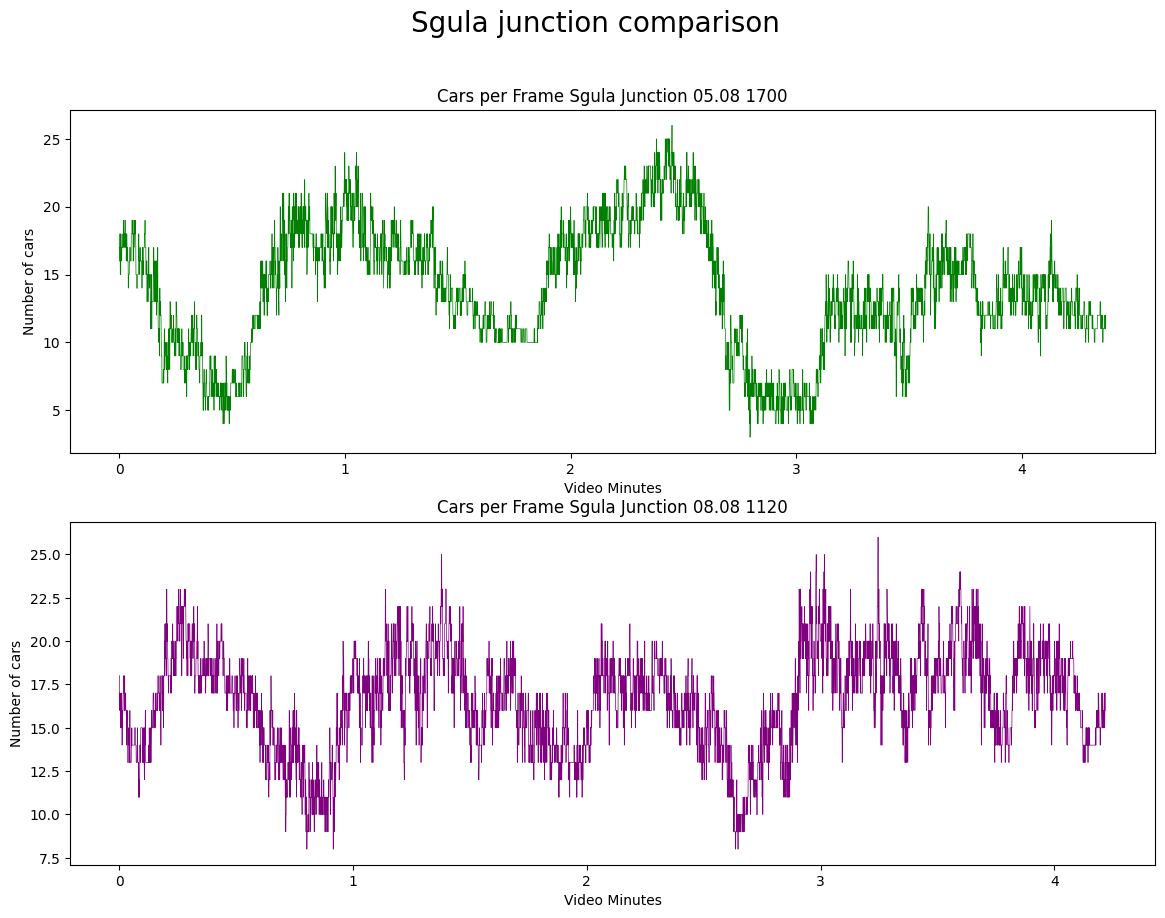

In [23]:
fig= plt.figure(figsize=(14,10), dpi=100)

plt.subplot(2,1,1)
plt.plot((frames_sgula_rh/24)/60, cars_perframe_sgula_rh, color= "green", lw= 0.5)
plt.xlabel('Video Minutes')
plt.ylabel('Number of cars')
plt.title('Cars per Frame Sgula Junction 05.08 1700')




plt.subplot(2,1,2)
plt.plot((frames_sgula_mm/24)/60, cars_perframe_sgula_mm, color= "purple", lw= 0.5)
plt.xlabel('Video Minutes')
plt.ylabel('Number of cars')
plt.title('Cars per Frame Sgula Junction 08.08 1120')

fig.suptitle("Sgula junction comparison", fontsize= 20)
plt.savefig('Sgula_comparision.jpg', dpi=300, bbox_inches='tight')
plt.show()

 # Bilu05.08-1737

In [24]:
bilu_rush_hour= pd.read_csv("bilu05.08-1737.csv")

In [25]:
bilu_rush_hour=bilu_rush_hour.drop(['Unnamed: 0'], 1)

In [26]:
date_bilu_rh= pd.to_datetime("2021.08.05 1737")


In [27]:
bilu_rush_hour ["datetime"]= date_bilu_rh
bilu_rush_hour

,Frame,label,id,confidence,datetime
0,1,car,0,52.45,2021-08-05 17:37:00
1,1,car,1,52.60,2021-08-05 17:37:00
2,1,truck,2,53.31,2021-08-05 17:37:00
3,1,car,3,60.32,2021-08-05 17:37:00
4,1,car,4,61.60,2021-08-05 17:37:00
...,...,...,...,...,...
82039,6437,car,193,82.66,2021-08-05 17:37:00
82040,6437,car,24,83.45,2021-08-05 17:37:00
82041,6437,car,171,83.58,2021-08-05 17:37:00
82042,6437,car,68,86.53,2021-08-05 17:37:00


In [28]:
bilu_rush_hour.nunique()

Frame         6437
label            4
id             232
confidence    4323
datetime         1
dtype: int64

In [29]:
bilu_rush_hour.groupby("id")['Frame'].count().describe()

count     232.000000
mean      353.637931
std       713.088799
min         1.000000
25%        52.000000
50%       145.000000
75%       307.000000
max      6232.000000
Name: Frame, dtype: float64

 # Bilu08.08-1155


In [30]:
bilu_middle_morning= pd.read_csv("bilu08.08-1155.csv")

In [31]:
bilu_middle_morning= bilu_middle_morning.drop(['Unnamed: 0'], 1)

In [32]:
date_bilu_mm= pd.to_datetime("2021.08.08 1155")

In [33]:
bilu_middle_morning ["datetime"]= date_bilu_mm
bilu_middle_morning

,Frame,label,id,confidence,datetime
0,1,car,0,50.10,2021-08-08 11:55:00
1,1,car,1,50.65,2021-08-08 11:55:00
2,1,car,2,54.41,2021-08-08 11:55:00
3,1,car,3,55.22,2021-08-08 11:55:00
4,1,car,4,60.03,2021-08-08 11:55:00
...,...,...,...,...,...
87050,6335,car,29,74.21,2021-08-08 11:55:00
87051,6335,car,112,80.90,2021-08-08 11:55:00
87052,6335,truck,1,81.17,2021-08-08 11:55:00
87053,6335,car,207,84.81,2021-08-08 11:55:00


In [34]:
bilu_middle_morning.nunique()

Frame         6222
label            4
id             218
confidence    4322
datetime         1
dtype: int64

In [35]:
bilu_middle_morning.groupby("id")['Frame'].count().describe()

count     218.000000
mean      399.334862
std       584.337257
min         1.000000
25%        58.250000
50%       189.000000
75%       475.750000
max      4183.000000
Name: Frame, dtype: float64

## Ploting vehicle type in pie chart

In [36]:
vehicule_type2=bilu_middle_morning.label.value_counts()
vehicule_type2

car          76425
truck         8834
bus           1766
motorbike       30
Name: label, dtype: int64

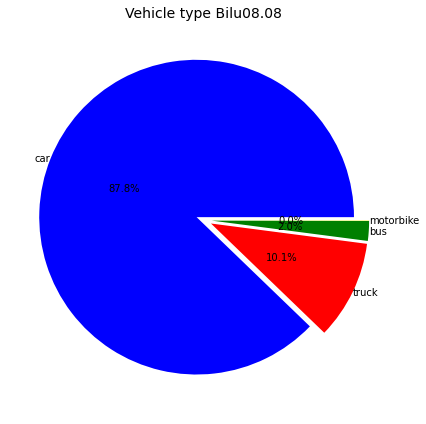

In [37]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(vehicule_type2, labels = ['car', 'truck', 'bus', 'motorbike'], colors = ['blue','red','green','yellow'], autopct="%.1f%%", pctdistance=0.5, labeldistance= 1, explode=[0.05]*4)
plt.title("Vehicle type Bilu08.08", fontsize=14);
pie.savefig("Vehicle type Bilu08.08.png")

# View the plot
plt.tight_layout()
plt.show()

### Getting the car id's that only have one label

In [38]:
newframe3= bilu_middle_morning.label.groupby([bilu_middle_morning.id]).describe()
newframe3

,count,unique,top,freq
id,,,,
0,537,2,car,536
1,4183,4,car,4072
2,2103,3,car,2071
3,2112,3,car,1421
4,1802,3,car,1190
...,...,...,...,...
218,62,2,car,38
219,3,1,car,3
220,2,1,truck,2


In [39]:
mask2=bilu_middle_morning.label.groupby([bilu_middle_morning.id]).describe()["unique"]<2
mask2

id
0      False
1      False
2      False
3      False
4      False
       ...  
218    False
219     True
220     True
221     True
222     True
Name: unique, Length: 218, dtype: bool

In [40]:
newframe3.loc[mask2]

,count,unique,top,freq
id,,,,
11,25,1,car,25
15,80,1,car,80
21,113,1,car,113
28,238,1,car,238
57,18,1,car,18
59,2,1,car,2
63,53,1,car,53
72,12,1,car,12
84,347,1,car,347


 # Haogen05.08-1730

In [41]:
haogen_rush_hour= pd.read_csv("haogen05.08-1730.csv")

In [42]:
haogen_rush_hour= haogen_rush_hour.drop(['Unnamed: 0'], 1)

In [43]:
date_haogen_rh= pd.to_datetime("2021.08.05 1730")

In [44]:
haogen_rush_hour["datetime"]= date_haogen_rh
haogen_rush_hour

,Frame,label,id,confidence,datetime
0,1,truck,0,56.93,2021-08-05 17:30:00
1,1,car,1,61.18,2021-08-05 17:30:00
2,1,truck,2,64.35,2021-08-05 17:30:00
3,1,car,3,71.37,2021-08-05 17:30:00
4,1,car,4,71.99,2021-08-05 17:30:00
...,...,...,...,...,...
66992,6519,car,55,69.15,2021-08-05 17:30:00
66993,6519,car,85,73.05,2021-08-05 17:30:00
66994,6519,car,47,73.37,2021-08-05 17:30:00
66995,6519,car,24,76.51,2021-08-05 17:30:00


In [45]:
haogen_rush_hour.nunique()

Frame         6519
label            4
id             117
confidence    4056
datetime         1
dtype: int64

In [46]:
haogen_rush_hour.groupby("id")['Frame'].count().describe()

count     117.000000
mean      572.623932
std       853.993618
min         1.000000
25%        35.000000
50%       276.000000
75%       769.000000
max      5738.000000
Name: Frame, dtype: float64

# Haogen08.08-1135

In [47]:
haogen_middle_morning= pd.read_csv("haogen08.08-1135.csv")

In [48]:
haogen_middle_morning= haogen_middle_morning.drop(['Unnamed: 0'], 1)

In [49]:
date_haogen_mm= pd.to_datetime("2021.08.08 1135")

In [50]:
haogen_middle_morning["datetime"]= date_haogen_mm
haogen_middle_morning

,Frame,label,id,confidence,datetime
0,1,car,0,50.17,2021-08-08 11:35:00
1,1,car,1,50.50,2021-08-08 11:35:00
2,1,car,2,65.55,2021-08-08 11:35:00
3,1,truck,3,67.90,2021-08-08 11:35:00
4,1,car,4,68.67,2021-08-08 11:35:00
...,...,...,...,...,...
46270,6520,truck,6,77.92,2021-08-08 11:35:00
46271,6520,car,51,80.68,2021-08-08 11:35:00
46272,6520,truck,22,81.04,2021-08-08 11:35:00
46273,6520,truck,87,81.69,2021-08-08 11:35:00


In [51]:
haogen_middle_morning.nunique()

Frame         6517
label            4
id             129
confidence    4003
datetime         1
dtype: int64

In [52]:
haogen_middle_morning.groupby("id")['Frame'].count().describe()

count     129.00000
mean      358.72093
std       478.32241
min         1.00000
25%        66.00000
50%       231.00000
75%       460.00000
max      3161.00000
Name: Frame, dtype: float64

# Nachsonim05.08-1754

In [53]:
nachsonim_rush_hour= pd.read_csv("nachsonim05.08-1754.csv")

In [54]:
nachsonim_rush_hour= nachsonim_rush_hour.drop(['Unnamed: 0'], 1)

In [55]:
date_nachsonim_rh= pd.to_datetime("2021.08.05 1754")

In [56]:
nachsonim_rush_hour["datetime"]= date_nachsonim_rh
nachsonim_rush_hour

,Frame,label,id,confidence,datetime
0,1,car,0,50.78,2021-08-05 17:54:00
1,1,car,1,50.95,2021-08-05 17:54:00
2,1,car,2,54.81,2021-08-05 17:54:00
3,1,car,3,56.20,2021-08-05 17:54:00
4,1,car,4,56.89,2021-08-05 17:54:00
...,...,...,...,...,...
91871,6363,car,47,77.54,2021-08-05 17:54:00
91872,6363,car,0,78.12,2021-08-05 17:54:00
91873,6363,car,158,86.45,2021-08-05 17:54:00
91874,6363,car,142,87.37,2021-08-05 17:54:00


In [57]:
nachsonim_rush_hour.nunique()

Frame         6363
label            4
id             229
confidence    4179
datetime         1
dtype: int64

In [58]:
nachsonim_rush_hour.groupby("id")['Frame'].count().describe()

count     229.000000
mean      401.205240
std       596.769561
min         1.000000
25%        41.000000
50%       194.000000
75%       470.000000
max      4572.000000
Name: Frame, dtype: float64

# Nachsonim08.08-1210

In [59]:
nachsonim_middle_morning= pd.read_csv("nachsonim08.08-1210.csv")

In [60]:
nachsonim_middle_morning= nachsonim_middle_morning.drop(['Unnamed: 0'], 1)

In [61]:
date_nachsonim_mm= pd.to_datetime("2021.08.08 1210")

In [62]:
nachsonim_middle_morning["datetime"]= date_nachsonim_mm
nachsonim_middle_morning

,Frame,label,id,confidence,datetime
0,1,car,0,52.08,2021-08-08 12:10:00
1,1,car,1,58.87,2021-08-08 12:10:00
2,1,truck,2,60.77,2021-08-08 12:10:00
3,1,truck,3,61.04,2021-08-08 12:10:00
4,1,car,4,64.06,2021-08-08 12:10:00
...,...,...,...,...,...
68898,6421,car,0,73.13,2021-08-08 12:10:00
68899,6421,car,32,74.89,2021-08-08 12:10:00
68900,6421,car,144,78.39,2021-08-08 12:10:00
68901,6421,car,126,85.40,2021-08-08 12:10:00


In [63]:
nachsonim_middle_morning.nunique()

Frame         6416
label            4
id             218
confidence    4243
datetime         1
dtype: int64

In [64]:
nachsonim_middle_morning.groupby("id")['Frame'].count().describe()

count     218.000000
mean      316.068807
std       452.415789
min         1.000000
25%        19.500000
50%       144.500000
75%       420.000000
max      2252.000000
Name: Frame, dtype: float64

# Combined

In [65]:
numbers={"Sgula05.08":[6294, 191, 454, 5116],
        "Sgula08.08": [6076, 208, 485, 4174],
        "Bilu05.08": [6437, 232, 353, 6232],
        "Bilu08.08": [6222, 218, 399, 4183],
        "Haogen05.08": [6519, 117, 572, 5738],
        "Haogen08.08": [6517, 129, 478, 3161],
        "Nach05.08": [6363, 229, 401, 4572],
        "Nachs08.08": [6416, 218, 316, 2252]}

In [66]:
junctions_numbers= pd.DataFrame(numbers, index=["Frames", "Cars detected", "Mean num. of frames by car","Max num. of frames by car"])
junctions_numbers

,Sgula05.08,Sgula08.08,Bilu05.08,Bilu08.08,Haogen05.08,Haogen08.08,Nach05.08,Nachs08.08
Frames,6294,6076,6437,6222,6519,6517,6363,6416
Cars detected,191,208,232,218,117,129,229,218
Mean num. of frames by car,454,485,353,399,572,478,401,316
Max num. of frames by car,5116,4174,6232,4183,5738,3161,4572,2252


In [67]:
junctions_numbers.loc["Max minutes by car"]= [3.5, 2.8, 4.3, 2.9, 3.9, 2.1, 3.1, 1.5]
junctions_numbers


,Sgula05.08,Sgula08.08,Bilu05.08,Bilu08.08,Haogen05.08,Haogen08.08,Nach05.08,Nachs08.08
Frames,6294.0,6076.0,6437.0,6222.0,6519.0,6517.0,6363.0,6416.0
Cars detected,191.0,208.0,232.0,218.0,117.0,129.0,229.0,218.0
Mean num. of frames by car,454.0,485.0,353.0,399.0,572.0,478.0,401.0,316.0
Max num. of frames by car,5116.0,4174.0,6232.0,4183.0,5738.0,3161.0,4572.0,2252.0
Max minutes by car,3.5,2.8,4.3,2.9,3.9,2.1,3.1,1.5


In [68]:
junctions_numbers.to_csv("Junctions numbers.csv")

In [69]:
import dataframe_image as dfi

In [70]:
dfi.export(junctions_numbers,"Junctions_combined.jpg")

In [71]:
height=junctions_numbers.loc["Mean num. of frames by car"]
height2=junctions_numbers.loc["Max num. of frames by car"]
type(height2)
height2l=list(height2)

In [72]:
x=list(junctions_numbers.columns)
x1= list(x[0:7:2])
x2= x[1::2]
print(type(x), type(x1),type(x2))

<class 'list'> <class 'list'> <class 'list'>


c:\users\eitan\pycharmprojects\databoothcamp\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


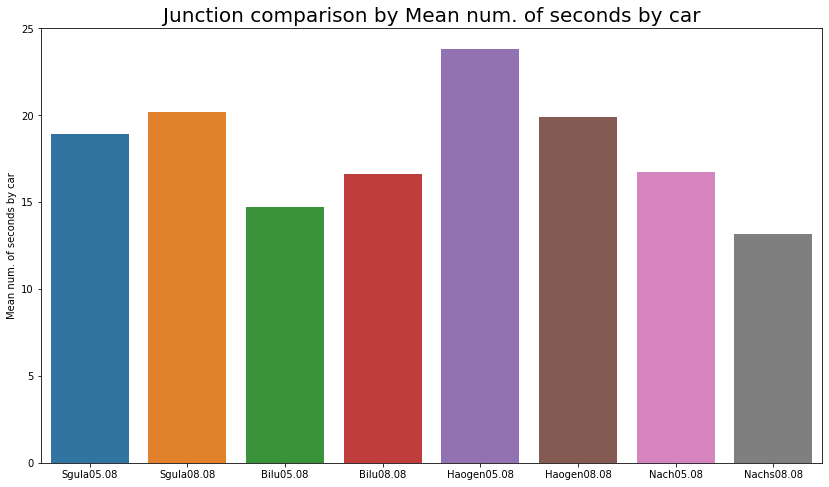

In [73]:
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x, height/24)
plt.ylabel("Mean num. of seconds by car")
plt.title('Junction comparison by Mean num. of seconds by car', fontsize= 20)
plt.savefig("Junction Comparision.jpg", dpi=300, bbox_inches='tight')
plt.show()

c:\users\eitan\pycharmprojects\databoothcamp\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


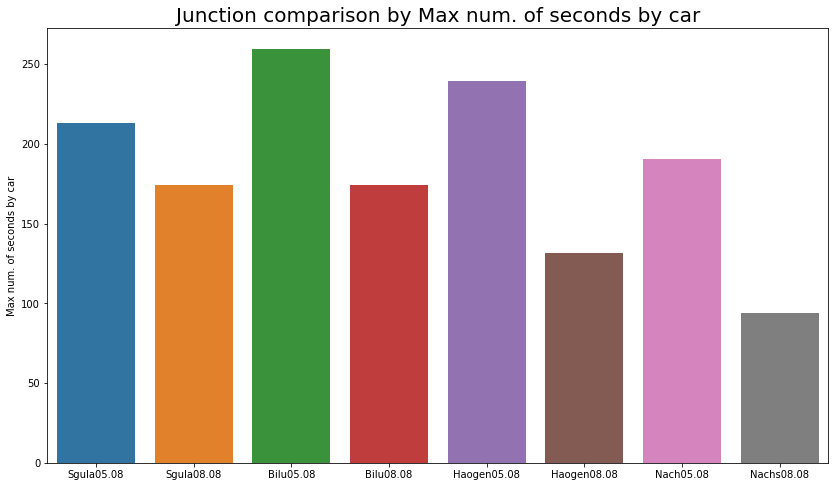

In [74]:
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x, height2/24)
plt.ylabel("Max num. of seconds by car")
plt.title('Junction comparison by Max num. of seconds by car', fontsize= 20)
plt.savefig("Junction Comparision2.jpg", dpi=300, bbox_inches='tight')
plt.show()


In [75]:
rush_hour=pd.DataFrame({"Sgula05.08":5116, "Bilu05.08": 6232, "Haogen05.08":5738, "Nach05.08": 4572}, index=["Max, num. of frames by car"])
middle_morning= pd.DataFrame({"Sgula08.08":4174, "Bilu08.08": 4183, "Haogen08.08":3161, "Nach08.08": 2252}, index=["Max num. of frames by car"])
rush_hour

,Sgula05.08,Bilu05.08,Haogen05.08,Nach05.08
"Max, num. of frames by car",5116,6232,5738,4572


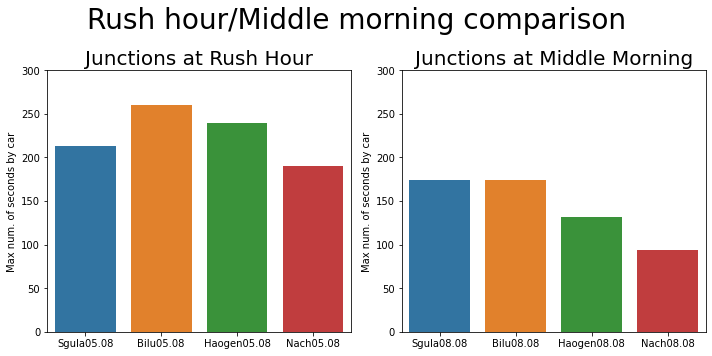

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plt.subplot (1,2,1)
sns.barplot(data=rush_hour/24)
plt.ylim([0,300])
plt.ylabel("Max num. of seconds by car")
plt.title('Junctions at Rush Hour', fontsize= 20)
plt.subplot (1,2,2)
sns.barplot(data=middle_morning/24)
plt.ylim([0,300])
plt.ylabel("Max num. of seconds by car")
plt.title('Junctions at Middle Morning', fontsize= 20)
fig.suptitle("Rush hour/Middle morning comparison", fontsize=28)
fig.tight_layout()
plt.savefig('RH-MM_comparison.jpg', dpi=300, bbox_inches='tight')
plt.show()








## How bad is traffic

We found out that at Rush Hours the cars that stayed the maximum amount of seconds in video exceeded 70% of video time, while at Middle Morning ws less than 70%.
Translated to minutes, at Middle Morning a car dwelled in video for a maximum time of less than 3 minutes and at Rush Hours they all exceeded the 3 minutes 